# Modelo normal

1. - Importar librerias

In [5]:
import os
import cv2
import numpy as np
from numpy import save
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import load
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

2. - Escalar las imagenes para entrenamiento y almacenar junto con las etiquetas en un arreglo de numpy 

In [6]:
lw = 150
db_path = '/Users/bastian/PycharmProjects/Data_fits/galaxies'

categories = ["Barred_spiral", "Elliptical", "Irregullar", "Lenticular", "Peculiar", "Spiral"]

training_data = []


def create_training_data():
    for category in categories:
        path = os.path.join(db_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):

            try:
                img_size = lw
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])

            except Exception as e:

                pass


create_training_data()

x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

img_size = lw
x = np.array(x).reshape(-1, img_size, img_size)
y = np.array(y)

x = x/255
print(x.shape)
print(y.shape)
print(y)
print(len(y))

save('x.npy', x)
save('y.npy', y)

(3895, 150, 150)
(3895,)
[0 0 0 ... 5 5 5]
3895


3. - Entrenar la NNET y almacenar los valores de accuracy  y loss en un archivo pandas. 

2.2.0
3895


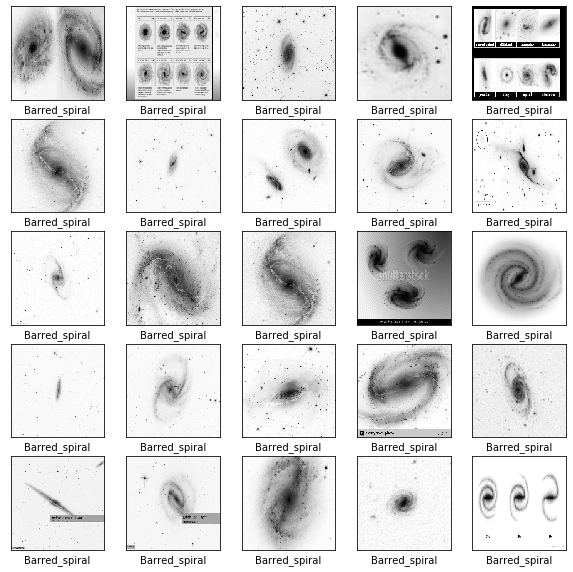

Epoch 1/50
122/122 [==============================] - 1s 12ms/step - loss: 2.4235 - accuracy: 0.2313
Epoch 2/50
122/122 [==============================] - 1s 11ms/step - loss: 1.7547 - accuracy: 0.2904
Epoch 3/50
122/122 [==============================] - 1s 11ms/step - loss: 1.6502 - accuracy: 0.3607
Epoch 4/50
122/122 [==============================] - 1s 11ms/step - loss: 1.5924 - accuracy: 0.3992
Epoch 5/50
122/122 [==============================] - 1s 12ms/step - loss: 1.5374 - accuracy: 0.4303
Epoch 6/50
122/122 [==============================] - 1s 12ms/step - loss: 1.5333 - accuracy: 0.4403
Epoch 7/50
122/122 [==============================] - 1s 12ms/step - loss: 1.4233 - accuracy: 0.4881
Epoch 8/50
122/122 [==============================] - 1s 12ms/step - loss: 1.3950 - accuracy: 0.5107
Epoch 9/50
122/122 [==============================] - 1s 12ms/step - loss: 1.3734 - accuracy: 0.5089
Epoch 10/50
122/122 [==============================] - 1s 12ms/step - loss: 1.2518 - accura

In [7]:
print(tf.__version__)

lw = 150

categories = ["Barred_spiral", "Elliptical", "Irregullar", "Lenticular", "Peculiar", "Spiral"]
x = load('x.npy')
y = load('y.npy')

print(len(x))


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i], cmap=plt.cm.binary)
    plt.xlabel(categories[y[i]])
plt.show()


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(lw, lw)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

checkpoint_path = "Checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
nep = 50
history = model.fit(x, y, epochs=nep)
print(history)

model.save('Galaxy_class.model')

vec = np.linspace(0, nep, 1000)
acc = history.history['accuracy']
loss = history.history['loss']
df = pd.DataFrame(list(zip(acc, loss)), columns=['Accuracy','Loss'])
df.to_csv('/Users/bastian/PycharmProjects/Data_fits/acc_loss_df.csv')
print(df)

4. - Escalar las imagenes para pruebas y almacenar junto con las etiquetas en un arreglo de numpy 

In [8]:
db_path = '/Users/bastian/PycharmProjects/Data_fits/ACC_test_db'

categories = ["Barred_spiral", "Elliptical", "Irregullar", "Lenticular", "Peculiar", "Spiral"]



training_data=[]

def create_training_data():
    for category in categories:
        path = os.path.join(db_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):

            try:
                img_size = 150
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])

            except Exception as e:

                pass

create_training_data()


x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)


img_size = 150
x = np.array(x).reshape(-1, img_size, img_size)
print(len(x))
print(len(y))


save('x_test.npy', x)
save('y_test.npy', y)

106
106


5. - Hacer las pruebas del modelo (Para navegar en las 106 imagenes modificar "ls" de 0 a 91)

4/4 [==============================] - 0s 2ms/step - loss: 0.7392 - accuracy: 0.7547

Test accuracy: 75.47169923782349 %
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 10)                2881418   
_________________________________________________________________
softmax_6 (Softmax)          (None, 10)                0         
Total params: 2,881,418
Trainable params: 2,881,418
Non-trainable params: 0
_________________________________________________________________


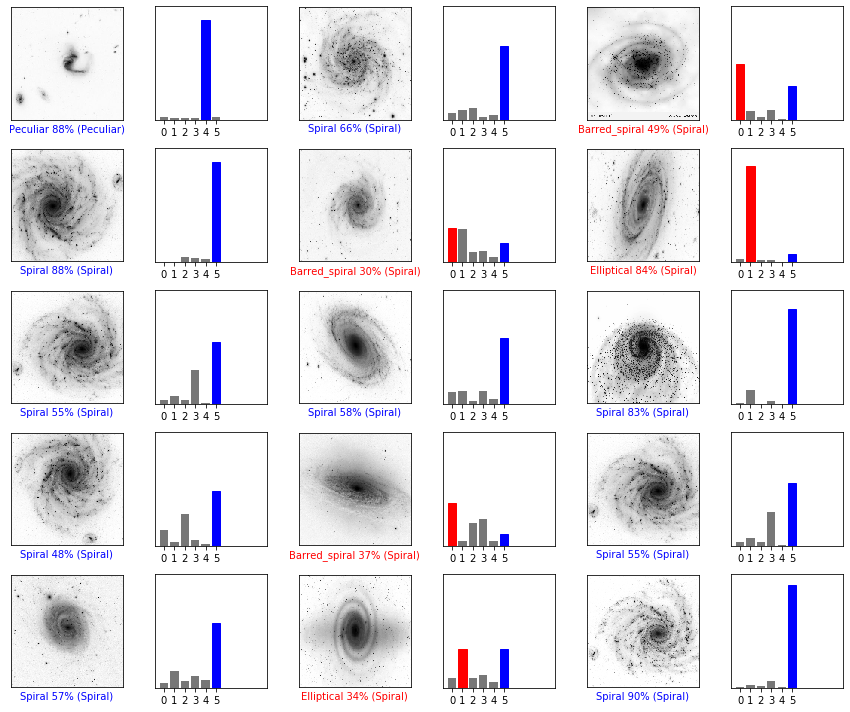

In [18]:
Categories = ["Barred_spiral", "Elliptical", "Irregullar", "Lenticular", "Peculiar", "Spiral"]
X = load('x_test.npy')/255
Y = load('y_test.npy')


model = tf.keras.models.load_model('Galaxy_class.model')


test_loss, test_acc = model.evaluate(X,  Y)

print('\nTest accuracy:', test_acc*100, '%')

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

probability_model.summary()

predictions = probability_model.predict(X)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Categories[predicted_label],
                                100*np.max(predictions_array),
                                Categories[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))



ls = 91
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+ls, predictions[i+ls], Y, X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+ls, predictions[i+ls], Y)
plt.tight_layout()
plt.show()

6. - Análisis del modelo 

In [14]:
nep = 50

data = pd.read_csv('acc_loss_df.csv')
acc = data['Accuracy']
loss = data['Loss']

vec = np.linspace(0, nep, 1000)

fig = go.Figure()

fig.add_trace(go.Scatter(x = vec,y = acc, name='accuracy', fill='tozeroy'))
fig.add_trace(go.Scatter(x = vec,y = loss, name='loss', fill='tozeroy'))


high_annotations = [dict(x=vec,
                         y=acc,
                         xref="x", yref="y",
                         ax=0, ay=-40)]
low_annotations = [dict(x=vec,
                        y=loss,
                        xref="x", yref="y",
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [False, False, False, False]},
                           {"title": "Model analysis",
                            "annotations": []}]),
                dict(label="Accuracy",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Accuracy",
                            "annotations": high_annotations}]),
                dict(label="Loss",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Loss",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Accuracy and Loss",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])


fig.update_layout(title='Model analysis',
                   xaxis_title='Epoch',
                   yaxis_title='Loss/Accuracy')

fig.show()